<a href="https://colab.research.google.com/github/Sahar-Zi/Medical-Speech/blob/main/Medical_Symptom_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Symptoms Audio Classification**

This data contains thousands of audio recordings for common medical symptoms like "knee pain" or "headache", totaling more than 8 hours of aggregated recording time. Each record was created by individual human contributors based on a given symptom.

These audio snippets can be used to train conversational agents in the medical field.

This dataset was created via a multi-job workflow. The first involved contributors writing text phrases to describe symptoms given. For example, for "headache", a contributor might write "I need help with my migraines". Subsequent jobs captured audio recordings for accepted text strings.

Note that some of the labels are incorrect and some of the audio files have poor quality.

I would recommend cleaning the dataset before training any machine learning models.

This dataset contains both the audio recordings and corresponding transcriptions.

patient_symptom_audio_test.zip | 2.3 GB

patient_symptom_audio_train.zip | 160.2 MB

patient_symptom_audio_validate.zip | 137.7

recordings-overview.csv | 1.7 MB

# **Table of Contents**

---

#### 1. [Libraries Imports](#SectionImports)

#### 2. [Section A (Explenatory Data Analysis and Feature Engineering)](#SectionA)

# **Libraries Imports**
<a class="anchor" id="SectionImports"></a>

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [37]:
dat=pd.read_csv("overview-of-recordings.csv")
quantitive_features = dat[['audio_clipping:confidence','background_noise_audible:confidence','quiet_speaker:confidence','overall_quality_of_the_audio']]
text_dat = dat[['prompt','audio_clipping','audio_clipping:confidence','background_noise_audible','background_noise_audible:confidence','overall_quality_of_the_audio','phrase']]
dat.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


I will dive in the data to understand the structure of it better:

In [38]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6661 entries, 0 to 6660
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   audio_clipping                       6661 non-null   object 
 1   audio_clipping:confidence            6661 non-null   float64
 2   background_noise_audible             6661 non-null   object 
 3   background_noise_audible:confidence  6661 non-null   float64
 4   overall_quality_of_the_audio         6661 non-null   float64
 5   quiet_speaker                        6661 non-null   object 
 6   quiet_speaker:confidence             6661 non-null   float64
 7   speaker_id                           6661 non-null   int64  
 8   file_download                        6661 non-null   object 
 9   file_name                            6661 non-null   object 
 10  phrase                               6661 non-null   object 
 11  prompt                        

I will make Change all the categorical columns to `category` in order to do EDA more accuratly.

In [39]:
dat['audio_clipping'] = dat['audio_clipping'].astype('category')
dat['background_noise_audible'] = dat['background_noise_audible'].astype('category')
dat['quiet_speaker'] = dat['quiet_speaker'].astype('category')
dat['speaker_id'] = dat['speaker_id'].astype('category')
dat['prompt'] = dat['prompt'].astype('category')
dat['writer_id'] = dat['writer_id'].astype('category')

# **Section A (Explantory Data Analysis and Feature Engineering)**
<a class="anchor" id="SectionA"></a>

## **Audio Quality Measures**
In this subsection I will delve into the audio quality measures which are:
* $\underline{Audio~Clipping}$: Audio clipping is a distortion in the waveform, it occurs when an amplifier is pushed beyond its maximum limit, causing the signal to get distorted.

* $\underline{Bakcground ~Noise~Audible}$:

* $\underline{Quiet~Speaker}$:

* $\underline{Overall~Quality~of~the~Audio}$:

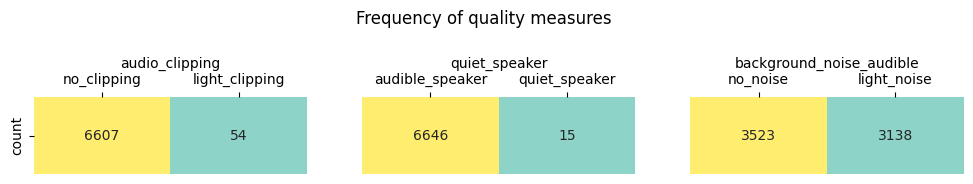

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 1))

sns.heatmap(dat['audio_clipping'].value_counts().to_frame().T, ax=axes[0], annot=True, fmt="d",cmap="Set3", cbar=False)
sns.heatmap(dat['quiet_speaker'].value_counts().to_frame().T, ax=axes[1], annot=True, fmt="d",cmap="Set3", cbar=False, yticklabels=False)
sns.heatmap(dat['background_noise_audible'].value_counts().to_frame().T, ax=axes[2], annot=True, fmt="d",cmap="Set3", cbar=False, yticklabels=False)
axes[0].xaxis.tick_top()
axes[1].xaxis.tick_top()
axes[2].xaxis.tick_top()
axes[0].xaxis.set_label_position('top')
axes[1].xaxis.set_label_position('top')
axes[2].xaxis.set_label_position('top')
fig.suptitle("Frequency of quality measures",y=1.75)
plt.show()

In [30]:
dat[['overall_quality_of_the_audio','audio_clipping:confidence','background_noise_audible:confidence','quiet_speaker:confidence']].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
overall_quality_of_the_audio,6661.0,3.678,0.379,3.000,3.330,3.67,4.0,5.0
audio_clipping:confidence,6661.0,0.985,0.071,0.338,1.000,1.00,1.0,1.0
background_noise_audible:confidence,6661.0,0.854,0.166,0.336,0.671,1.00,1.0,1.0
quiet_speaker:confidence,6661.0,0.985,0.070,0.342,1.000,1.00,1.0,1.0


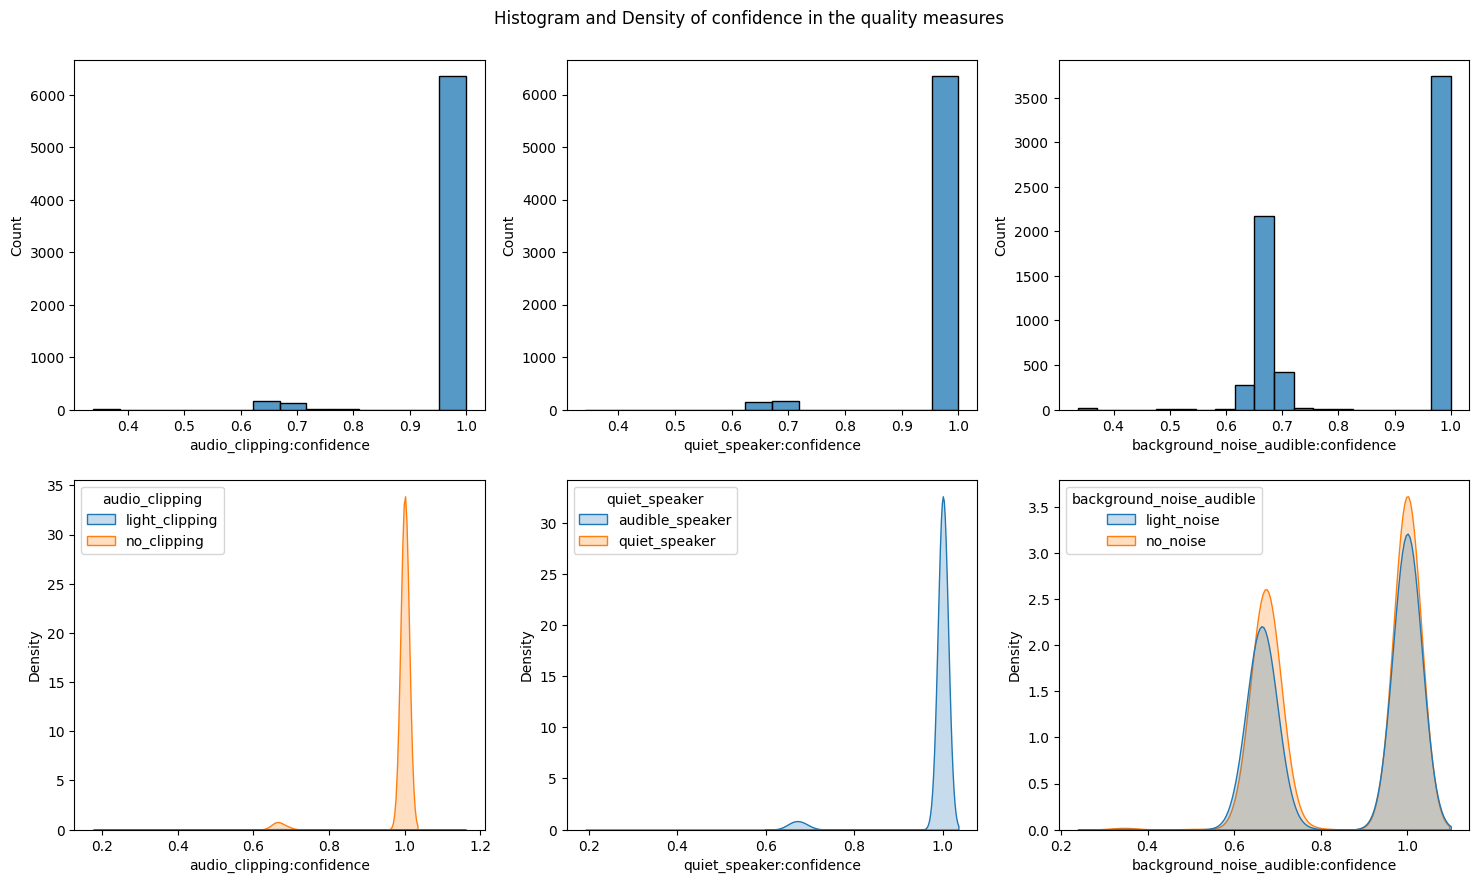

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))
sns.histplot(data=dat, ax=axes[0,0], x="audio_clipping:confidence", fill=True)
sns.histplot(data=dat, ax=axes[0,1], x="quiet_speaker:confidence", fill=True)
sns.histplot(data=dat, ax=axes[0,2], x="background_noise_audible:confidence", fill=True)
sns.kdeplot(data=dat, ax=axes[1,0], x="audio_clipping:confidence", hue="audio_clipping", fill=True)
sns.move_legend(axes[1,0], "upper left")
sns.kdeplot(data=dat, ax=axes[1,1], x="quiet_speaker:confidence", hue="quiet_speaker", fill=True, legend=True)
sns.move_legend(axes[1,1], "upper left")
sns.kdeplot(data=dat, ax=axes[1,2], x="background_noise_audible:confidence", hue="background_noise_audible", fill=True, legend=True)
sns.move_legend(axes[1,2], "upper left")
fig.suptitle("Histogram and Density of confidence in the quality measures",y=0.93)
plt.show()

There are

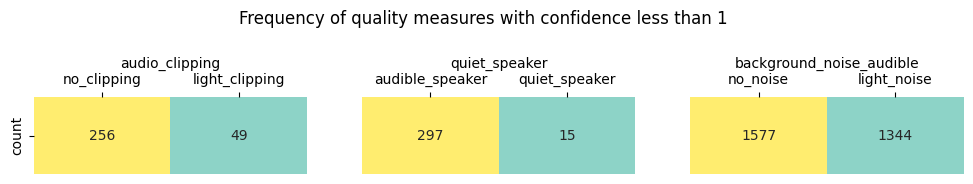

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 1))

sns.heatmap(dat[dat['audio_clipping:confidence']<1]['audio_clipping'].value_counts().to_frame().T, ax=axes[0], annot=True, fmt="d",cmap="Set3", cbar=False)
sns.heatmap(dat[dat['quiet_speaker:confidence']<1]['quiet_speaker'].value_counts().to_frame().T, ax=axes[1], annot=True, fmt="d",cmap="Set3", cbar=False, yticklabels=False)
sns.heatmap(dat[dat['background_noise_audible:confidence']<1]['background_noise_audible'].value_counts().to_frame().T, ax=axes[2], annot=True, fmt="d",cmap="Set3", cbar=False, yticklabels=False)
axes[0].xaxis.tick_top()
axes[1].xaxis.tick_top()
axes[2].xaxis.tick_top()
axes[0].xaxis.set_label_position('top')
axes[1].xaxis.set_label_position('top')
axes[2].xaxis.set_label_position('top')
fig.suptitle("Frequency of quality measures with confidence less than 1",y=1.75)
plt.show()

In [50]:
quality_measures = ['audio_clipping:confidence', 'background_noise_audible:confidence', 'quiet_speaker:confidence']

dfs = []
for column in quality_measures:
    filtered_data = dat[dat[column] < 1][column]
    description = filtered_data.describe()
    dfs.append(description)

pd.concat(dfs, axis=1).T.round(3)

,count,mean,std,min,25%,50%,75%,max
audio_clipping:confidence,305.0,0.664,0.047,0.338,0.657,0.666,0.679,0.765
background_noise_audible:confidence,2921.0,0.668,0.029,0.336,0.658,0.668,0.679,0.822
quiet_speaker:confidence,312.0,0.671,0.025,0.342,0.660,0.671,0.684,0.722


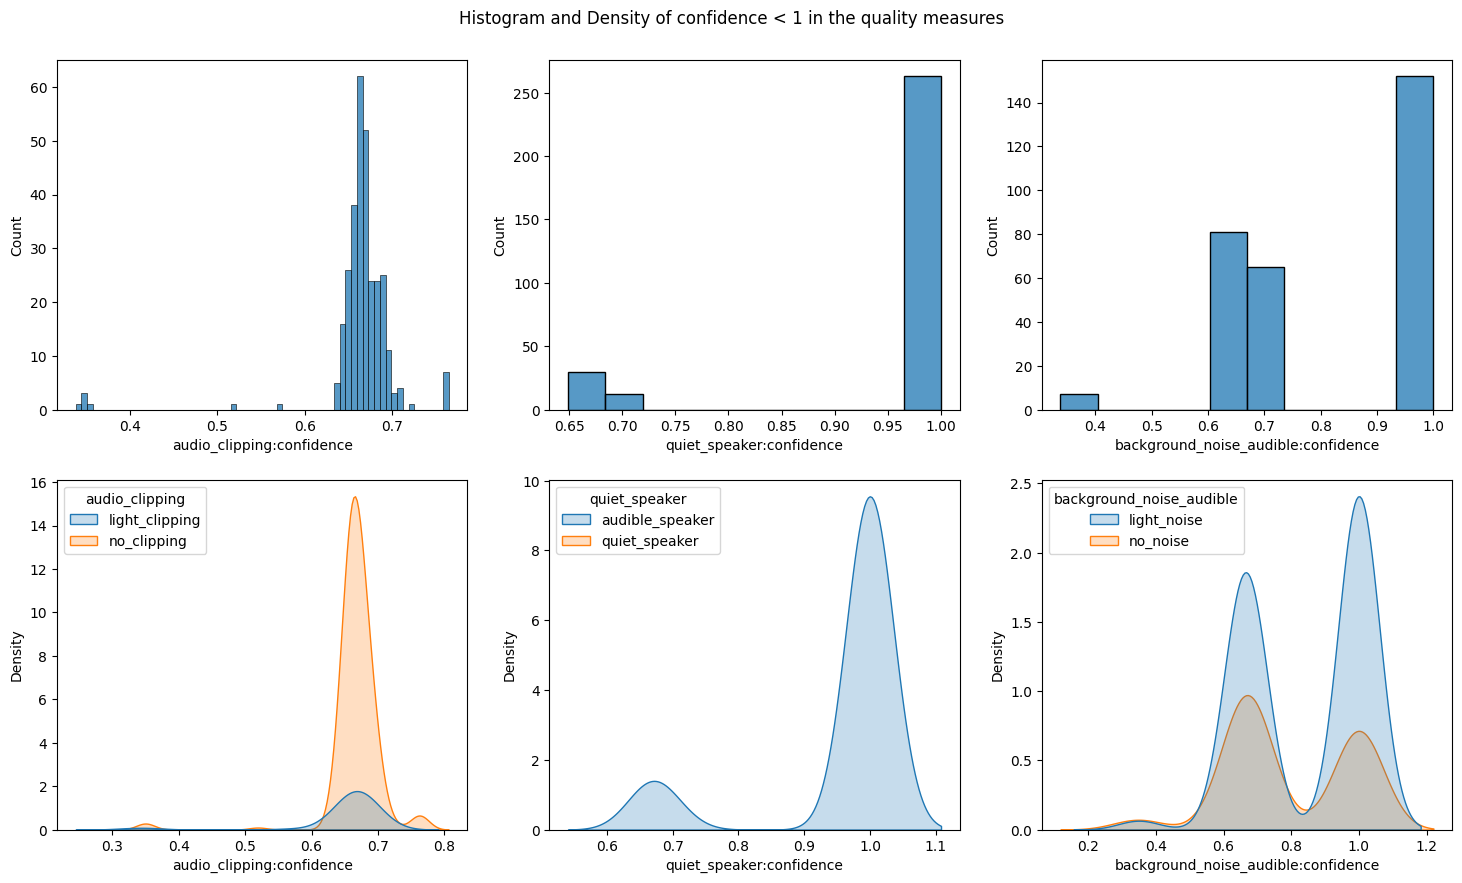

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))
sns.histplot(data=dat[dat['audio_clipping:confidence'] < 1], ax=axes[0,0], x="audio_clipping:confidence", fill=True)
sns.histplot(data=dat[dat['audio_clipping:confidence'] < 1], ax=axes[0,1], x="quiet_speaker:confidence", fill=True)
sns.histplot(data=dat[dat['audio_clipping:confidence'] < 1], ax=axes[0,2], x="background_noise_audible:confidence", fill=True)
sns.kdeplot(data=dat[dat['audio_clipping:confidence'] < 1], ax=axes[1,0], x="audio_clipping:confidence", hue="audio_clipping", fill=True)
sns.move_legend(axes[1,0], "upper left")
sns.kdeplot(data=dat[dat['audio_clipping:confidence'] < 1], ax=axes[1,1], x="quiet_speaker:confidence", hue="quiet_speaker", fill=True, legend=True)
sns.move_legend(axes[1,1], "upper left")
sns.kdeplot(data=dat[dat['audio_clipping:confidence'] < 1], ax=axes[1,2], x="background_noise_audible:confidence", hue="background_noise_audible", fill=True, legend=True)
sns.move_legend(axes[1,2], "upper left")
fig.suptitle("Histogram and Density of confidence < 1 in the quality measures",y=0.93)
plt.show()

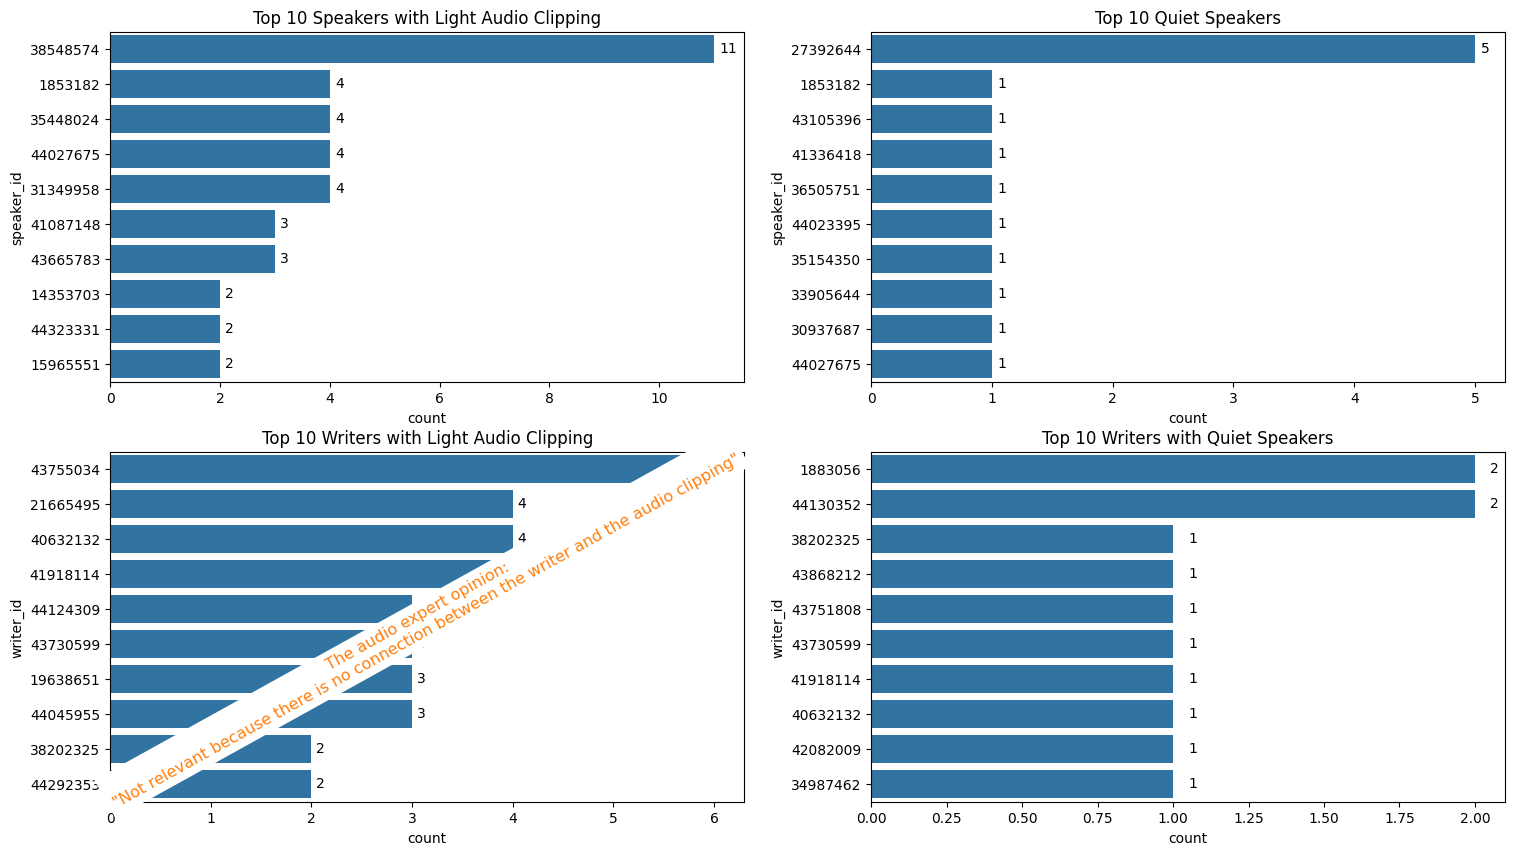

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(18,10))
audio_clipping_speakers = dat[dat['audio_clipping']=='light_clipping']['speaker_id'].value_counts().head(10)
audio_clipping_writers = dat[dat['audio_clipping']=='light_clipping']['writer_id'].value_counts().head(10)
quiet_speaker_speakers = dat[dat['quiet_speaker']=='quiet_speaker']['speaker_id'].value_counts().head(10)
quiet_speaker_writers = dat[dat['quiet_speaker']=='quiet_speaker']['writer_id'].value_counts().head(10)

sns.countplot(y="speaker_id", data=dat[dat['audio_clipping']=='light_clipping'], order=audio_clipping_speakers[audio_clipping_speakers > 0].index, ax=axes[0,0])
axes[0,0].set_title('Top 10 Speakers with Light Audio Clipping')
for p in axes[0,0].patches:
    axes[0,0].annotate(int(p.get_width()), (p.get_width() + 0.1, p.get_y() + 0.5))
sns.countplot(y="speaker_id", data=dat[dat['quiet_speaker']=='quiet_speaker'], order=quiet_speaker_speakers[quiet_speaker_speakers > 0].index, ax=axes[0,1])
axes[0,1].set_title('Top 10 Quiet Speakers')
for p in axes[0,1].patches:
    axes[0,1].annotate(int(p.get_width()), (p.get_width() + 0.05, p.get_y() + 0.5))

sns.countplot(y="writer_id", data=dat[dat['audio_clipping']=='light_clipping'], order=audio_clipping_writers[audio_clipping_writers > 0].index, ax=axes[1,0])
axes[1,0].set_title('Top 10 Writers with Light Audio Clipping')
for p in axes[1,0].patches:
    axes[1,0].annotate(int(p.get_width()), (p.get_width() + 0.05, p.get_y() + 0.5))
axes[1,0].text(3.1, 4.4, 'The audio expert opinion:\n\"Not relevant because there is no connection between the writer and the audio clipping\"',
               horizontalalignment='center', verticalalignment='center', fontsize=11.5, color='tab:orange', rotation=29,
               bbox=dict(facecolor='white', edgecolor='none'))
sns.countplot(y="writer_id", data=dat[dat['quiet_speaker']=='quiet_speaker'], order=quiet_speaker_writers[quiet_speaker_writers > 0].index, ax=axes[1,1])
axes[1,1].set_title('Top 10 Writers with Quiet Speakers')
for p in axes[1,1].patches:
    axes[1,1].annotate(int(p.get_width()), (p.get_width() + 0.05, p.get_y() + 0.5))
plt.show()

(0.0, 5.0)

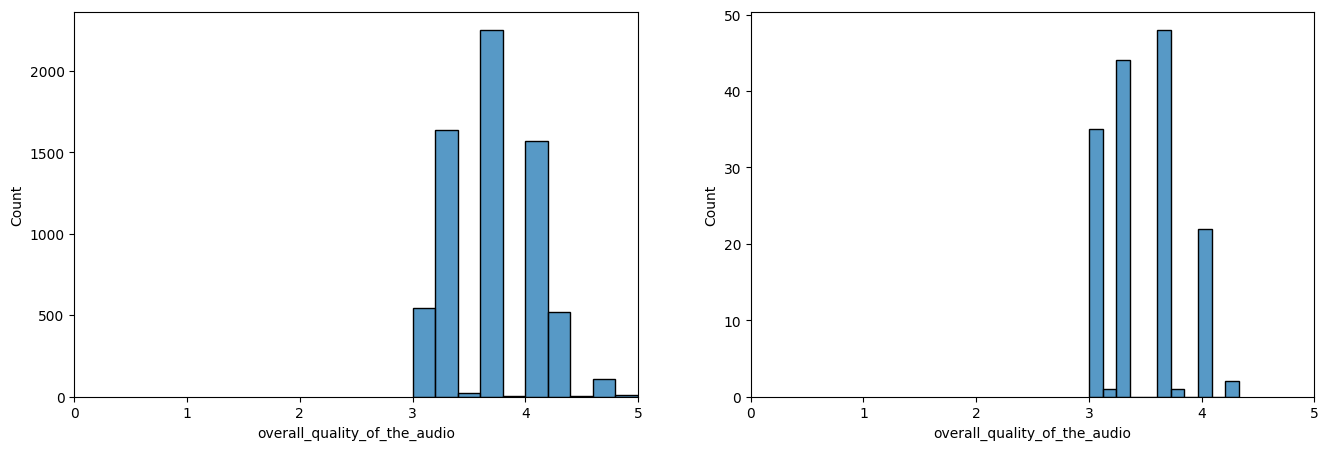

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.histplot(data=dat, x="overall_quality_of_the_audio", ax=axes[0], fill=True, bins=10)
axes[0].set_xlim(0, 5)

<Axes: >

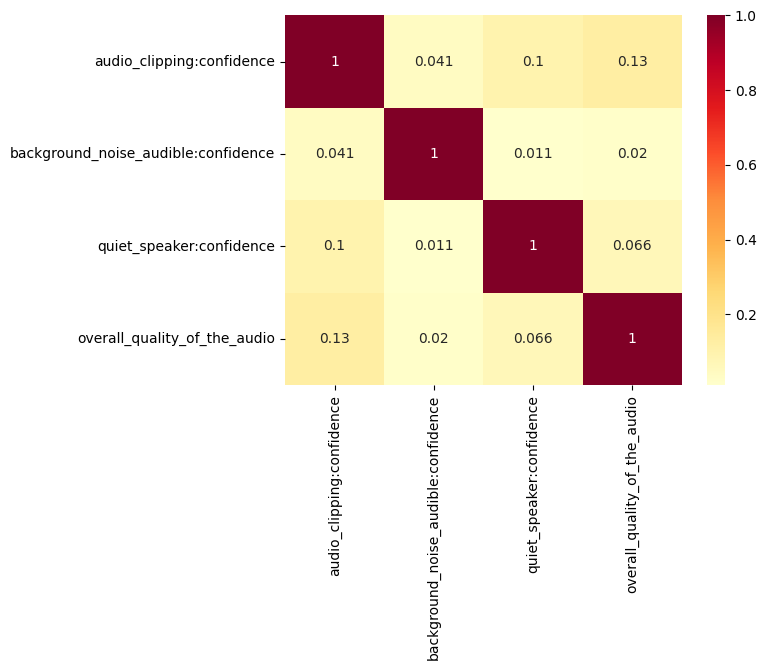

In [35]:
sns.heatmap(quantitive_features.corr(), cmap='YlOrRd', annot=True)

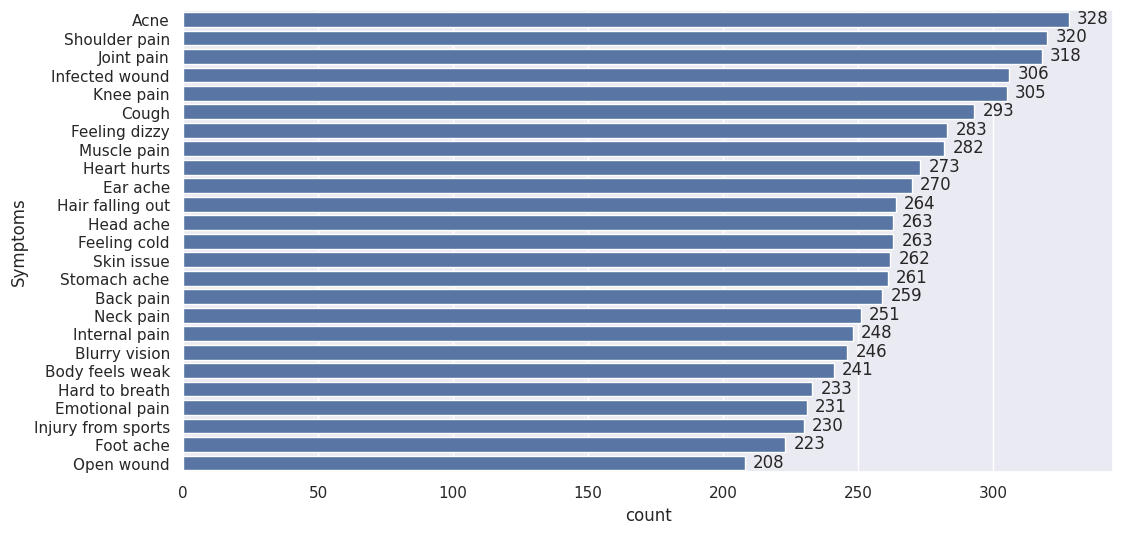

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="prompt", data=dat, order=dat['prompt'].value_counts().index)
plt.ylabel("Symptoms")
for p in ax.patches:
  ax.annotate(int(p.get_width()), (p.get_width()+3, p.get_y()+0.6))
plt.show()

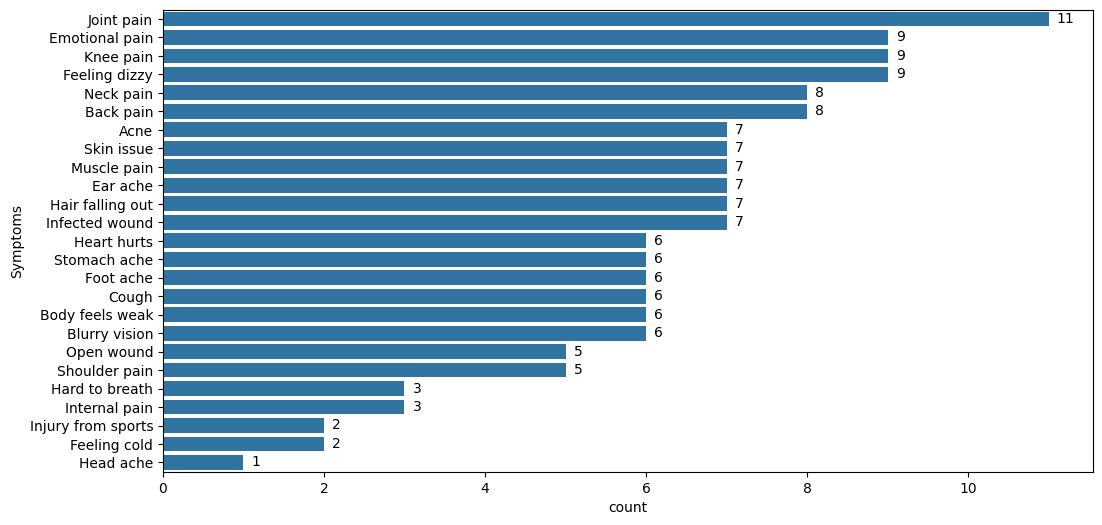

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y="prompt", data=dat[(dat['audio_clipping:confidence']<1) & (dat['background_noise_audible:confidence']<1)], order=dat[(dat['audio_clipping:confidence']<1) & (dat['background_noise_audible:confidence']<1)]['prompt'].value_counts().index)
plt.ylabel("Symptoms")
for p in ax.patches:
  ax.annotate(int(p.get_width()), (p.get_width()+0.1, p.get_y()+0.6))
plt.show()

In [1]:
phrases = ' '.join(text_dat['phrase'].tolist())
tokens = nltk.word_tokenize(phrases)
fdist = FreqDist(tokens)
plt.figure(figsize=(12, 6))
fdist.plot().T

NameError: name 'text_dat' is not defined

## Feature Engineering

I will combine the quality measures value and conf into one column as follows:

$$
new~audio~clipping_i=confidence_i\cdot\left\{\begin{array}{ll}
1&, audio~clipping_i="no~clipping"\\
-1&, audio~clipping_i="light~clipping"
\end{array}\right.
$$

So now, for the quality measure we have one feature in range $[-1,1]$, where values around $0$ means bad confidence in quality measure and around the edges $\{-1,1\}$ means good confidence in quality measure.

In [43]:
dat['audio_clipping_new'] = dat['audio_clipping'].map({'no_clipping': 1, 'light_clipping': -1}).astype(int) * dat['audio_clipping:confidence']
dat['background_noise_audible_new'] = dat['background_noise_audible'].map({'no_noise': 1, 'light_noise': -1}).astype(int) * dat['background_noise_audible:confidence']
dat['quiet_speaker_new'] = dat['quiet_speaker'].map({'audible_speaker': 1, 'quiet_speaker': -1}).astype(int) * dat['quiet_speaker:confidence']
new_quantitive_dat = dat[['audio_clipping_new','background_noise_audible_new','quiet_speaker_new','overall_quality_of_the_audio']]

<Axes: xlabel='audio_clipping_new', ylabel='Count'>

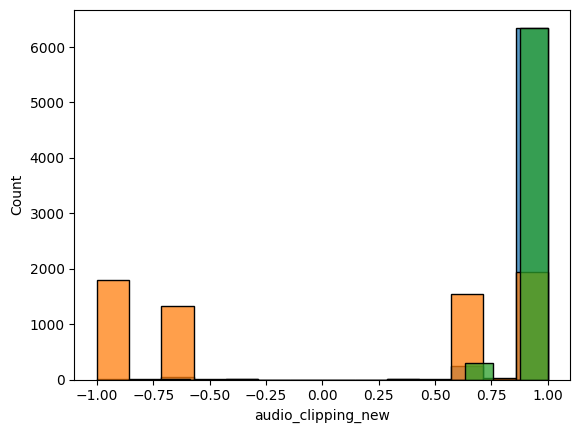

In [57]:
sns.histplot(data=new_quantitive_dat, x="audio_clipping_new", fill=True)
sns.histplot(data=new_quantitive_dat, x="background_noise_audible_new", fill=True)
sns.histplot(data=new_quantitive_dat, x="quiet_speaker_new", fill=True)

new correlation

<Axes: >

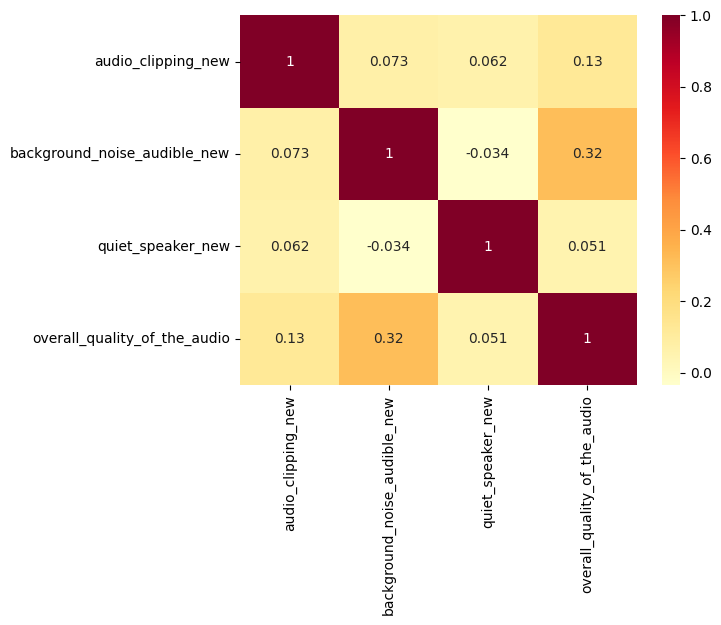

In [44]:
sns.heatmap(new_quantitive_dat.corr(), cmap='YlOrRd', annot=True)